In [1]:
import os

In [2]:
path = 'C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/'

In [3]:
print(os.listdir(path))

['cats', 'dogs', 'horses', 'humans']


In [4]:
for i in os.listdir(path):
    print(i, len(os.listdir(path + i)))

cats 181
dogs 181
horses 181
humans 181


In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [6]:
img = image.load_img(path + 'cats/cat.50.jpg')

In [7]:
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


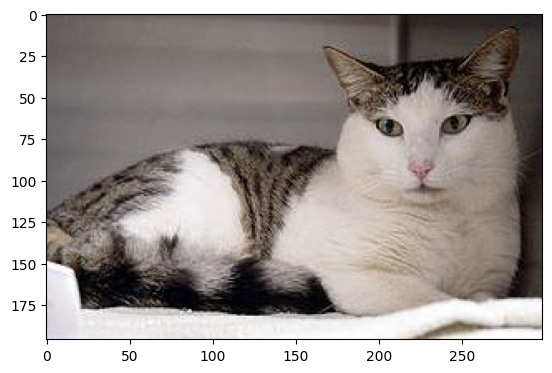

In [8]:
plt.imshow(img)

In [9]:
img = image.img_to_array(img)

In [10]:
print(type(img), img.shape)

<class 'numpy.ndarray'> (196, 299, 3)


In [11]:
from keras.models import Sequential
import keras

In [12]:
img_shape = (250, 250, 3)
num_classes = 4

model = keras.Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(40, kernel_size = (5, 5), strides = (1,2), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1,1), padding = 'same'),
    keras.layers.Conv2D(60, kernel_size = (5, 5), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1,1), padding = 'same'),
    keras.layers.Conv2D(80, kernel_size = (3, 3), strides = (1,1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1,1), padding = 'same'),
    keras.layers.Conv2D(110, kernel_size = (3, 3), strides = (1,1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1,1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(num_classes, activation = 'softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 123, 40)      3040      
                                                                 
 max_pooling2d (MaxPooling2  (None, 246, 123, 40)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 60, 60)       60060     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 121, 60, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 58, 80)       43280     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 119, 58, 80)       0

In [14]:
adam = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_X = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    vertical_flip=True
)

In [17]:
train_gen = train_X.flow_from_directory(path,
                                        target_size = (250, 250),
                                        batch_size = 30,
                                        class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [18]:
for i, j in train_gen:
    print(i, j)
    print(i.shape, j.shape)
    break

[[[[0.5375735  0.6791926  0.4764307 ]
   [0.6778681  0.8112015  0.61120147]
   [0.67044556 0.80378467 0.6037827 ]
   ...
   [0.63674486 0.7230194  0.4681174 ]
   [0.64195865 0.72823316 0.4733312 ]
   [0.6471725  0.733447   0.47854504]]

  [[0.45710844 0.6019162  0.39809135]
   [0.5843164  0.7288963  0.52514744]
   [0.5834656  0.7193809  0.51852024]
   ...
   [0.6563831  0.75076175 0.4877557 ]
   [0.65733105 0.7531316  0.48870364]
   [0.6582791  0.7555015  0.48965162]]

  [[0.40359396 0.55536634 0.3481076 ]
   [0.42675126 0.57298636 0.36849624]
   [0.38985026 0.5356978  0.33087745]
   ...
   [0.65882355 0.7568628  0.4901961 ]
   [0.65882355 0.7568628  0.4901961 ]
   [0.65882355 0.7568628  0.4901961 ]]

  ...

  [[0.45978814 0.6316032  0.39752534]
   [0.4955622  0.6641897  0.45366347]
   [0.43570852 0.60433596 0.42373663]
   ...
   [0.47108084 0.48627454 0.42843235]
   [0.51367825 0.51966625 0.46105412]
   [0.5516825  0.55938023 0.4953764 ]]

  [[0.45290872 0.625297   0.38720617]
   [0.4

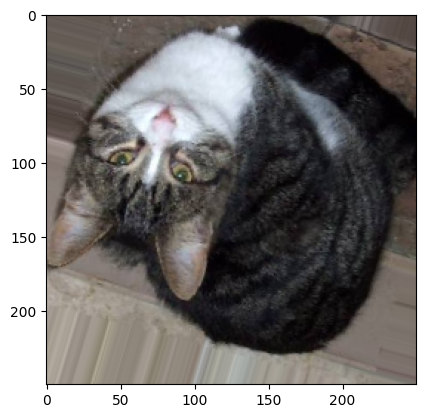

In [19]:
plt.imshow(i[22])

In [20]:
hist = model.fit(train_gen, epochs = 30)

Epoch 1/30
25/25 [==============================] - 145s 5s/step - loss: 444.3773 - accuracy: 0.2486 - precision: 0.2400 - recall: 0.0497
Epoch 2/30
25/25 [==============================] - 131s 5s/step - loss: 1.3888 - accuracy: 0.2500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/30
25/25 [==============================] - 131s 5s/step - loss: 1.3868 - accuracy: 0.2486 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/30
25/25 [==============================] - 128s 5s/step - loss: 1.3869 - accuracy: 0.2362 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/30
25/25 [==============================] - 132s 5s/step - loss: 1.3870 - accuracy: 0.2390 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/30
25/25 [==============================] - 131s 5s/step - loss: 1.3876 - accuracy: 0.2500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/30
25/25 [==============================] - 140s 6s/step - loss: 1.3884 - accuracy: 0.2238 - precision: 0.0000e+00 - recall: 0.0000e+0

KeyboardInterrupt: 